<a href="https://colab.research.google.com/github/SharonCamacho/Workshop/blob/master/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLEANING DATA WITH PYTHON** ⭐ ***for dummies***

En este workbook aprenderemos un poco sobre como explorar nuestros datos y prepararlos realizar los modelos que quieras! 🙌🙆‍♀️

In [0]:
#Se importan las librerías que nos ayudarán a manipular el dataframe

import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Se guardan los datos en la variable data

data = pd.read_csv('/Users/sharon/Documents/DataSet.csv', sep=";")

#### Si usas Collaboratory usa las siguientes dos celdas: 🕵️‍♀️🕵️‍♂️

In [0]:
# Esta celda solo es necesaria si usamos Collaboratory

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DataSet.csv to DataSet.csv
User uploaded file "DataSet.csv" with length 2104390 bytes


In [0]:
# Esta celda solo es necesaria si usamos Collaboratory

data = pd.read_csv('DataSet.csv',  sep=";")

### Iniciemos!!! 💪

Para explorar el data set utilizaremos las siguientes funciones y métodos:

```python
df.head()
df.tail()
df.info()
df.shape
df.columns
df.describe()
df.value_counts()
df.unique()
df.nunique()
```

In [0]:
# Muestra las primeras n filas del data set
data.head()

,Nombre,Edad,Tr@bajo,Trabajo,Estado_Civil,Nivel_escolaridad,Nivel_escolaridad.1,Tiene_Credito?,Medio_de_Comunicación,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,V2016,V2017,V2018
0,ketty-elvira/niño-calderon,58,management,management,married,tertiary,tertiary,no,unknown,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,490.004,669.895
1,yanira-pilar/garcia-barreto,44,technician,technician,single,secondary,secondary,no,unknown,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,361.837,245.154
2,milton-marina/hernandez-vega,33,entrepreneur,entrepreneur,married,secondary,secondary,no,unknown,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,903.292,166.285
3,rocio-constanza/mora-lopez,47,blue-collar,blue-collar,married,No informa,No informa,no,unknown,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,823.176,13.273
4,yeimi-constanza/arenas-torres,33,NaN,NaN,single,No informa,No informa,no,unknown,198,24/06/17,Express_Aire,Startups,Suplementos_Oficina,Telefonos_comunicaciones,68.063,552.045,123.810


In [0]:
# Muestra las últimas n filas del data set
data.tail()

,Nombre,Edad,Tr@bajo,Trabajo,Estado_Civil,Nivel_escolaridad,Nivel_escolaridad.1,Tiene_Credito?,Medio_de_Comunicación,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,V2016,V2017,V2018
12088,#¿NOMBRE?,53,admin.,admin.,married,secondary,secondary,no,unknown,194,15/02/16,Express_Tierra,Personas,Tecnología,Copiadoras,92.231,130.177,91.766
12089,ana-elena/gonzalez-tabima,41,technician,technician,married,secondary,secondary,no,unknown,267,1/07/16,Bajo,Corporativo,Suplementos_Oficina,Suplementos_Oficina,31.780,198.730,284.971
12090,nestor-orlando/barrios-ballen,39,technician,technician,married,secondary,secondary,no,unknown,16,5/02/16,Regular,Corporativo,Muebles,Telefonos,98.756,288.815,827.528
12091,adriana-jacqueline/triviño-sandoval,42,technician,technician,married,secondary,secondary,no,unknown,11,6/02/18,Regular,Corporativo,Muebles,Tijeras,2.906,108.929,138.229
12092,norma-patricia/patiño-ripe,5,management,management,married,tertiary,tertiary,no,unknown,75,11/05/17,Regular,Personas,Muebles,Mesas,44.651,985.918,553.566


Se observa que existen datos 'unkknown', títulos con caracteres adicionales, nombres con caracteres adicionales, ventas y utilidad por años.

In [0]:
#Muestra los tipos de datos que tiene el datos set y la cantidad de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12093 entries, 0 to 12092
Data columns (total 18 columns):
Nombre                          12093 non-null object
Edad                            12093 non-null int64
Tr@bajo                         11994 non-null object
Trabajo                         11994 non-null object
Estado_Civil                    12093 non-null object
Nivel_escolaridad               12093 non-null object
Nivel_escolaridad.1             12093 non-null object
Tiene_Credito?                  12093 non-null object
Medio_de_Comunicación           12093 non-null object
Duracion_ultimo_contacto_seg    12093 non-null int64
Order_D4te                      12093 non-null object
envio23$%3                      12093 non-null object
Segment                         12093 non-null object
Categ                           12093 non-null object
SubCat                          12093 non-null object
V2016                           12093 non-null float64
V2017                       

Trabajo y nivel de escolaridad están repetidas, trabajo tiene valores nulos. Eliminamos los valores nulos

In [0]:
#Muestra el tamaño del data set
data.shape

(12093, 18)

In [0]:
#Muestra el nombre de las columnas
data.columns

Index([u'Nombre', u'Edad', u'Tr@bajo', u'Trabajo', u'Estado_Civil',
       u'Nivel_escolaridad', u'Nivel_escolaridad.1', u'Tiene_Credito?',
       u'Medio_de_Comunicación', u'Duracion_ultimo_contacto_seg',
       u'Order_D4te', u'envio23$%3', u'Segment', u'Categ', u'SubCat', u'V2016',
       u'V2017', u'V2018'],
      dtype='object')

In [0]:
#Muestra el resumen de las variables numéricas
data.describe()

#cómo hago para mirar las no numéricas?

,Edad,Duracion_ultimo_contacto_seg,V2016,V2017,V2018
count,12093.000000,12093.000000,12093.000000,12093.000000,12093.000000
mean,36.774332,209.865956,55.259546,494.921256,503.029002
std,14.144244,239.459645,57.594519,289.794717,289.869014
min,2.000000,1.000000,1.002000,1.054000,1.091000
25%,31.000000,57.000000,27.054000,243.326000,250.078000
50%,38.000000,146.000000,52.145000,487.681000,504.459000
75%,46.000000,267.000000,76.212000,749.219000,755.359000
max,61.000000,3881.000000,996.000000,999.510000,999.576000


In [0]:
data.isnull().any()

Nombre                          False
Edad                            False
Tr@bajo                          True
Trabajo                          True
Estado_Civil                    False
Nivel_escolaridad               False
Nivel_escolaridad.1             False
Tiene_Credito?                  False
Medio_de_Comunicación           False
Duracion_ultimo_contacto_seg    False
Order_D4te                      False
envio23$%3                      False
Segment                         False
Categ                           False
SubCat                          False
V2016                           False
V2017                           False
V2018                           False
dtype: bool

In [0]:
# Valores unicos por columna teniendo en cuenta nulos
data.nunique(dropna=False)

Nombre                          12028
Edad                               42
Tr@bajo                            12
Trabajo                            12
Estado_Civil                        3
Nivel_escolaridad                   4
Nivel_escolaridad.1                 4
Tiene_Credito?                      2
Medio_de_Comunicación               1
Duracion_ultimo_contacto_seg      894
Order_D4te                       1096
envio23$%3                          4
Segment                             4
Categ                               3
SubCat                             26
V2016                           11419
V2017                           12038
V2018                           12033
dtype: int64

In [0]:
# Cuantos registros existen en la columna 'Nivel_escolaridad' sin nulos
data['Nivel_escolaridad'].value_counts()

secondary     6643
primary       2413
tertiary      2404
No informa     633
Name: Nivel_escolaridad, dtype: int64

In [0]:
# Valores únicos en la columna 'Nivel_escolaridad'
data['Nivel_escolaridad'].unique()

array(['tertiary', 'secondary', 'No informa', 'primary'], dtype=object)

### Manos a la obra!

Ahora que ya conocemos nuestro dataset, vamos a limpiarlo para que quede como lo necesitamos

In [0]:
#Elimina los valores nulos del data set
data = data.dropna()

In [0]:
data.isnull().any()

Nombre                          False
Edad                            False
Tr@bajo                         False
Trabajo                         False
Estado_Civil                    False
Nivel_escolaridad               False
Nivel_escolaridad.1             False
Tiene_Credito?                  False
Medio_de_Comunicación           False
Duracion_ultimo_contacto_seg    False
Order_D4te                      False
envio23$%3                      False
Segment                         False
Categ                           False
SubCat                          False
V2016                           False
V2017                           False
V2018                           False
dtype: bool

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11994 entries, 0 to 12092
Data columns (total 18 columns):
Nombre                          11994 non-null object
Edad                            11994 non-null int64
Tr@bajo                         11994 non-null object
Trabajo                         11994 non-null object
Estado_Civil                    11994 non-null object
Nivel_escolaridad               11994 non-null object
Nivel_escolaridad.1             11994 non-null object
Tiene_Credito?                  11994 non-null object
Medio_de_Comunicación           11994 non-null object
Duracion_ultimo_contacto_seg    11994 non-null int64
Order_D4te                      11994 non-null object
envio23$%3                      11994 non-null object
Segment                         11994 non-null object
Categ                           11994 non-null object
SubCat                          11994 non-null object
V2016                           11994 non-null float64
V2017                       

In [0]:
data['Medio_de_Comunicación'].value_counts()

unknown    11994
Name: Medio_de_Comunicación, dtype: int64

Todos son unknow, entonces eliminamos esa columna

In [0]:
data = data.drop(data.loc[:,['Medio_de_Comunicación','Nivel_escolaridad.1','Tr@bajo']], axis=1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11994 entries, 0 to 12092
Data columns (total 15 columns):
Nombre                          11994 non-null object
Edad                            11994 non-null int64
Trabajo                         11994 non-null object
Estado_Civil                    11994 non-null object
Nivel_escolaridad               11994 non-null object
Tiene_Credito?                  11994 non-null object
Duracion_ultimo_contacto_seg    11994 non-null int64
Order_D4te                      11994 non-null object
envio23$%3                      11994 non-null object
Segment                         11994 non-null object
Categ                           11994 non-null object
SubCat                          11994 non-null object
V2016                           11994 non-null float64
V2017                           11994 non-null float64
V2018                           11994 non-null float64
dtypes: float64(3), int64(2), object(10)
memory usage: 1.5+ MB


Observamos que ya no existen la columna

In [0]:
#se crea una nueva tabla llamada ventas donde pivoteo los datos
ventas = pd.melt(frame=data, id_vars='Nombre', value_vars=['V2016', 'V2017','V2018'])
ventas.head()

,Nombre,variable,value
0,ketty-elvira/niño-calderon,V2016,22.483
1,yanira-pilar/garcia-barreto,V2016,52.225
2,milton-marina/hernandez-vega,V2016,90.924
3,rocio-constanza/mora-lopez,V2016,2.681
4,claudia-stella/lopez-montoya,V2016,25.144


In [0]:
#Agrego las columnas variable y valor 
data["Ventas"]= ventas['value']
data["Años"]= ventas['variable']
data

,Nombre,Edad,Trabajo,Estado_Civil,Nivel_escolaridad,Tiene_Credito?,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,V2016,V2017,V2018,Ventas,Años
0,ketty-elvira/niño-calderon,58,management,married,tertiary,no,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,490.004,669.895,22.483,V2016
1,yanira-pilar/garcia-barreto,44,technician,single,secondary,no,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,361.837,245.154,52.225,V2016
2,milton-marina/hernandez-vega,33,entrepreneur,married,secondary,no,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,903.292,166.285,90.924,V2016
3,rocio-constanza/mora-lopez,47,blue-collar,married,No informa,no,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,823.176,13.273,2.681,V2016
5,claudia-stella/lopez-montoya,35,management,married,tertiary,no,139,17/07/18,Express_Aire,Corporativo,Suplementos_Oficina,Papel,25.144,263.574,183.894,685.000,V2016
6,#¿NOMBRE?,28,management,single,tertiary,no,217,2/01/16,Express_Tierra,Personas,Suplementos_Oficina,Maquinas_Oficina,685.000,869.217,230.038,91.288,V2016
7,ayda-patricia/forero-torres,42,entrepreneur,divorced,tertiary,yes,38,8/02/18,Express_Tierra,Personas,Suplementos_Oficina,Sillas,91.288,490.689,242.102,76.319,V2016
8,sandra-ivan/bolivar-lemus,58,retired,married,primary,no,5,18/05/18,Regular,Startups,Tecnología,Papel,76.319,158.927,948.683,35.677,V2016
9,rosa-/bautista-laverde,43,technician,single,secondary,no,55,18/08/17,Regular,Personas,Suplementos_Oficina,Accesorios,35.677,204.282,9.592,85.080,V2016
10,elizabeth-/cera-mahecha,41,admin.,divorced,secondary,no,222,30/05/17,Regular,Personas,Suplementos_Oficina,Papel,85.080,441.630,536.436,66.922,V2016


In [0]:
#Elimino las otras columnas pues ya no las necesito
data = data.drop(['V2016', 'V2017','V2018'], 1)
data.head()

,Nombre,Edad,Trabajo,Estado_Civil,Nivel_escolaridad,Tiene_Credito?,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,Ventas,Años
0,ketty-elvira/niño-calderon,58,management,married,tertiary,no,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,V2016
1,yanira-pilar/garcia-barreto,44,technician,single,secondary,no,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,V2016
2,milton-marina/hernandez-vega,33,entrepreneur,married,secondary,no,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,V2016
3,rocio-constanza/mora-lopez,47,blue-collar,married,No informa,no,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,V2016
5,claudia-stella/lopez-montoya,35,management,married,tertiary,no,139,17/07/18,Express_Aire,Corporativo,Suplementos_Oficina,Papel,685.000,V2016


In [0]:
#Nombres y Apellidos
data.Nombre = [str(x).replace("-"," ") for x in data['Nombre']]
data.Nombre[0:5]

0      ketty elvira/niño calderon
1     yanira pilar/garcia barreto
2    milton marina/hernandez vega
3      rocio constanza/mora lopez
5    claudia stella/lopez montoya
Name: Nombre, dtype: object

In [0]:
#Seperamos Nombre y Apellido
new = data["Nombre"].str.split("/", n = 1, expand = True) 
new.head()

,0,1
0,ketty elvira,niño calderon
1,yanira pilar,garcia barreto
2,milton marina,hernandez vega
3,rocio constanza,mora lopez
5,claudia stella,lopez montoya


In [0]:
# Se pone el nombre en una nueva columna
data["Nombres"]= new[0]
data.head()

,Nombre,Edad,Trabajo,Estado_Civil,Nivel_escolaridad,Tiene_Credito?,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,Ventas,Años,Nombres
0,ketty elvira/niño calderon,58,management,married,tertiary,no,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,V2016,ketty elvira
1,yanira pilar/garcia barreto,44,technician,single,secondary,no,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,V2016,yanira pilar
2,milton marina/hernandez vega,33,entrepreneur,married,secondary,no,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,V2016,milton marina
3,rocio constanza/mora lopez,47,blue-collar,married,No informa,no,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,V2016,rocio constanza
5,claudia stella/lopez montoya,35,management,married,tertiary,no,139,17/07/18,Express_Aire,Corporativo,Suplementos_Oficina,Papel,685.000,V2016,claudia stella


In [0]:
# Se pone el apellido en una nueva columna
data["Apellido"]= new[1] 
data.head()

,Nombre,Edad,Trabajo,Estado_Civil,Nivel_escolaridad,Tiene_Credito?,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,Ventas,Años,Nombres,Apellido
0,ketty elvira/niño calderon,58,management,married,tertiary,no,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,V2016,ketty elvira,niño calderon
1,yanira pilar/garcia barreto,44,technician,single,secondary,no,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,V2016,yanira pilar,garcia barreto
2,milton marina/hernandez vega,33,entrepreneur,married,secondary,no,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,V2016,milton marina,hernandez vega
3,rocio constanza/mora lopez,47,blue-collar,married,No informa,no,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,V2016,rocio constanza,mora lopez
5,claudia stella/lopez montoya,35,management,married,tertiary,no,139,17/07/18,Express_Aire,Corporativo,Suplementos_Oficina,Papel,685.000,V2016,claudia stella,lopez montoya


In [0]:
# Se elimina la columna Nombre del Data Set
data.drop("Nombre", axis=1) 
data.head()

,Nombre,Edad,Trabajo,Estado_Civil,Nivel_escolaridad,Tiene_Credito?,Duracion_ultimo_contacto_seg,Order_D4te,envio23$%3,Segment,Categ,SubCat,Ventas,Años,Nombres,Apellido
0,ketty elvira/niño calderon,58,management,married,tertiary,no,261,13/09/17,Regular,Hogares,Tecnología,Cuadernos,22.483,V2016,ketty elvira,niño calderon
1,yanira pilar/garcia barreto,44,technician,single,secondary,no,151,25/03/18,Express_Aire,Corporativo,Muebles,Lapiceros_y_Marcadores,52.225,V2016,yanira pilar,garcia barreto
2,milton marina/hernandez vega,33,entrepreneur,married,secondary,no,76,26/09/17,Express_Aire,Corporativo,Suplementos_Oficina,Papel,90.924,V2016,milton marina,hernandez vega
3,rocio constanza/mora lopez,47,blue-collar,married,No informa,no,92,14/07/16,Regular,Startups,Suplementos_Oficina,Reglas_tijeras,2.681,V2016,rocio constanza,mora lopez
5,claudia stella/lopez montoya,35,management,married,tertiary,no,139,17/07/18,Express_Aire,Corporativo,Suplementos_Oficina,Papel,685.000,V2016,claudia stella,lopez montoya


In [0]:
data.columns

Index([u'Nombre', u'Edad', u'Trabajo', u'Estado_Civil', u'Nivel_escolaridad',
       u'Tiene_Credito?', u'Duracion_ultimo_contacto_seg', u'Order_D4te',
       u'envio23$%3', u'Segment', u'Categ', u'SubCat', u'Ventas', u'Años',
       u'Nombres', u'Apellido'],
      dtype='object')

In [0]:
data.Categ.value_counts()

Suplementos_Oficina    4009
Muebles                4006
Tecnología             3979
Name: Categ, dtype: int64

In [0]:
data.Segment.value_counts()

Hogares        3032
Personas       2989
Startups       2987
Corporativo    2986
Name: Segment, dtype: int64

### A visualizar!!!  📊📈📉

Ahora grafiquemos nuestros datos para saber más de ellos

In [0]:
#Importamos librería
import seaborn as sns

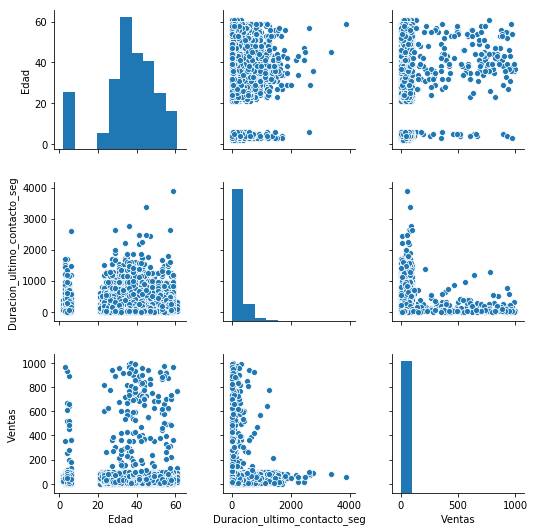

In [0]:
sns.pairplot(data)

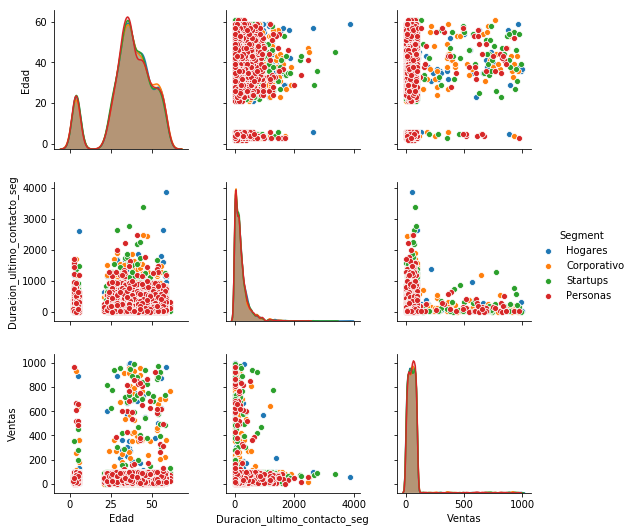

In [0]:
sns.pairplot(data, hue = 'Segment')

### A Analizar!  👩‍🏫👩‍💻👩‍💼
Creo un df nuevo con el análisis de los ingresos

In [0]:
data.columns

Index([u'Nombre', u'Edad', u'Trabajo', u'Estado_Civil', u'Nivel_escolaridad',
       u'Tiene_Credito?', u'Duracion_ultimo_contacto_seg', u'Order_D4te',
       u'envio23$%3', u'Segment', u'Categ', u'SubCat', u'Ventas', u'Años',
       u'Nombres', u'Apellido'],
      dtype='object')

In [0]:
#Filtro el dataset
analisis_ventas = data.loc[:,['Trabajo','Estado_Civil','Segment','envio23$%3','Categ', 'SubCat', 'Ventas', 'Años']]
analisis_ventas.head()

,Trabajo,Estado_Civil,Segment,envio23$%3,Categ,SubCat,Ventas,Años
0,management,married,Hogares,Regular,Tecnología,Cuadernos,22.483,V2016
1,technician,single,Corporativo,Express_Aire,Muebles,Lapiceros_y_Marcadores,52.225,V2016
2,entrepreneur,married,Corporativo,Express_Aire,Suplementos_Oficina,Papel,90.924,V2016
3,blue-collar,married,Startups,Regular,Suplementos_Oficina,Reglas_tijeras,2.681,V2016
5,management,married,Corporativo,Express_Aire,Suplementos_Oficina,Papel,685.000,V2016


In [0]:
#Muestro los totales por la categoría deseada
results = analisis_ventas.groupby('Estado_Civil', as_index=False).sum()
results

,Estado_Civil,Ventas
0,divorced,90088.764
1,married,442626.903
2,single,175862.715


In [0]:
#results['Ventas'] = results['Ventas'].map('${:,.1f}'.format)
results

,Estado_Civil,Ventas
0,divorced,90088.764
1,married,442626.903
2,single,175862.715


In [0]:
results2 = analisis_ventas.groupby('Categ',as_index=False).sum()
#results2['Ventas'] = results2['Ventas'].map('${:,.1f}'.format)
results2

,Categ,Ventas
0,Muebles,238965.109
1,Suplementos_Oficina,239681.465
2,Tecnología,229931.808


In [0]:
results3 = analisis_ventas.groupby('Trabajo',as_index=False).sum()
#results3['Ventas'] = results3['Ventas'].map('${:,.1f}'.format)
results3

,Trabajo,Ventas
0,admin.,84803.088
1,blue-collar,216703.508
2,entrepreneur,27123.779
3,housemaid,18588.160
4,management,107564.216
5,retired,29760.772
6,self-employed,20807.269
7,services,77693.984
8,student,6566.690
9,technician,104048.667


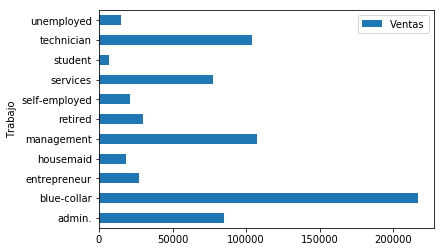

In [0]:
results3.plot(x='Trabajo', y='Ventas', kind='barh',sort_columns=True, )

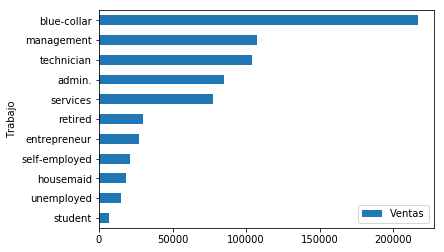

In [0]:
results3.sort_values('Ventas', ascending=True).plot.barh(x='Trabajo', y='Ventas')

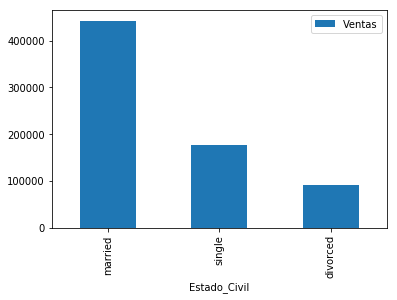

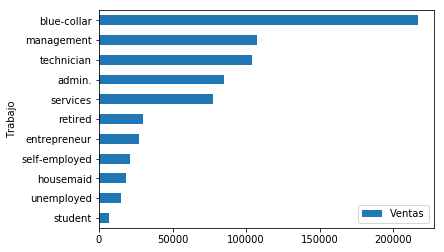

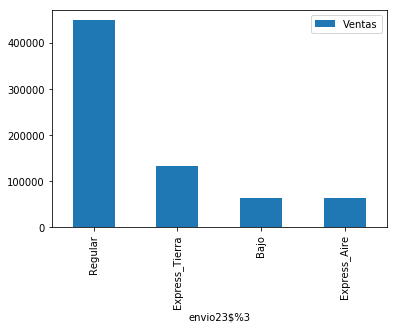

In [0]:
results.sort_values('Ventas', ascending=False).plot.bar(x='Estado_Civil', y='Ventas')
results3.sort_values('Ventas', ascending=True).plot.barh(x='Trabajo', y='Ventas')

results4 = analisis_ventas.groupby('envio23$%3', as_index=False).sum()
results4.sort_values('Ventas', ascending=False).plot.bar(x='envio23$%3', y='Ventas')

## GRACIAS!! 💁‍♀️😁